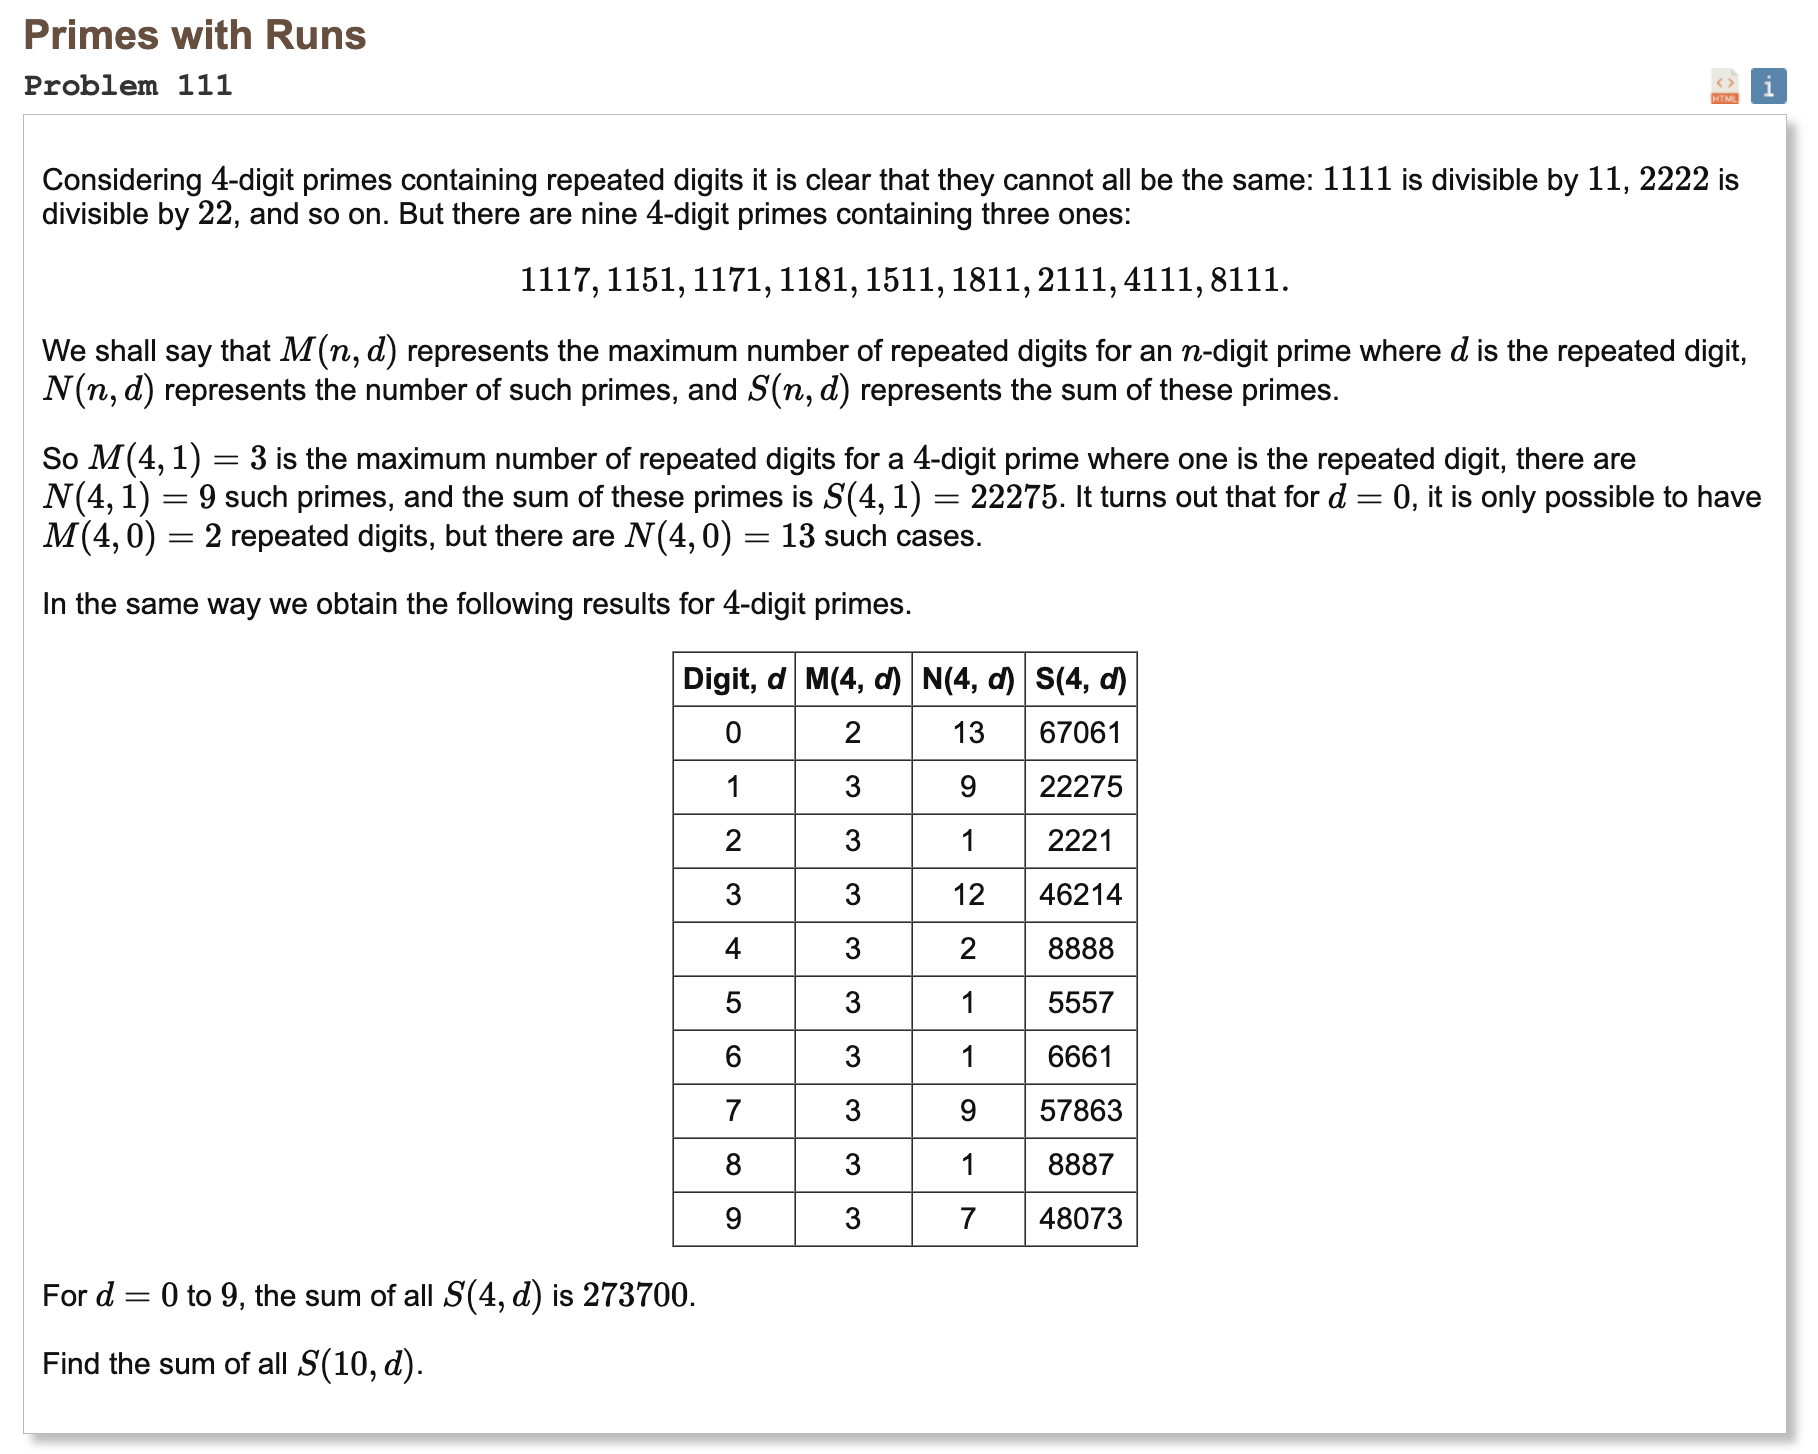

## Initial approach

* for each digit in 0-9, try to maximize how many times d appears
* for each d, scan m for 9 to 0 (m=count of digit d used)
* generate all 10 digit numbers with the rule. skip leading zero and numbers failing this rules
* for d = 0 ensure that digit is not 0
* for each candidate, build numbers by assinging m replacement positions
* let S(10,d) be the sum of those primes

In [1]:
import itertools
import math

def is_prime(n):
    if n < 2:
        return False
    if n % 2 == 0:
        return n == 2
    limit = int(math.sqrt(n)) + 1
    for i in range(3, limit, 2):
        if n % i == 0:
            return False
    return True

def generate_numbers(d, replace_count):
    positions = range(10)
    for repl in itertools.combinations(positions, replace_count):
        digits = [str(d)] * 10
        choices = []
        for pos in repl:
            if pos == 0:
                choices.append([str(x) for x in range(1, 10) if x != d])
            else:
                choices.append([str(x) for x in range(10) if x != d])
        for vals in itertools.product(*choices):
            for i, pos in enumerate(repl):
                digits[pos] = vals[i]
            if digits[0] == "0":
                continue
            num = int("".join(digits))
            yield num

def S_10_d(d):
    for replace_count in range(1, 11):
        primes = []
        for num in generate_numbers(d, replace_count):
            if is_prime(num):
                primes.append(num)
        if primes:
            return sum(primes)
    return 0

def solve():
    total = 0
    s_dict = {}
    for d in range(10):
        s = S_10_d(d)
        s_dict[d] = s
        total += s
    return total, s_dict

In [2]:
%%time
total, s_values = solve()
print("All S values:", s_values)
print("Result:", total)

All S values: {0: 38000000042, 1: 12882626601, 2: 97447914665, 3: 23234122821, 4: 4444444447, 5: 5555555557, 6: 6666666661, 7: 59950904793, 8: 285769942206, 9: 78455389922}
Result: 612407567715
CPU times: user 163 ms, sys: 2.22 ms, total: 165 ms
Wall time: 165 ms
